In [1]:
import os
import requests
import json
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Fetch COVID-19 Cases Since Day-One

In [2]:
csv_path = 'covid-data.csv'
url = 'https://api.covid19api.com/dayone/country/united-states/status/confirmed/live'

if not os.path.exists(csv_path):
    # fetch cases in the US from day one
    r = requests.get(url)
    if not r.ok:
        raise Exception(f'Could not fetch data at {url} : {r}')
    data = r.json()

    df = pd.DataFrame.from_dict(data)
    
    # save this to a csv to we don't have to fetch again
    df.to_csv('covid-data.csv', index=False)
else:
    df = pd.read_csv(csv_path)

# convert strings to native python objects
df[['CityCode', 'Lat', 'Lon', 'Cases']] = df[['CityCode', 'Lat', 'Lon', 'Cases']].apply(pd.to_numeric) # convert to numbers
df['Date'] = df['Date'].apply(pd.to_datetime) # convert to datetime object
df['Date'] = df['Date'].dt.date # keep date and remove time

display(df.keys())
display(df)

Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Cases', 'Status', 'Date'],
      dtype='object')

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,United States of America,US,Washington,King,53033.0,47.49,-121.83,1,confirmed,2020-01-23
1,United States of America,US,Washington,King,53033.0,47.49,-121.83,1,confirmed,2020-01-24
2,United States of America,US,Illinois,Cook,17031.0,41.84,-87.82,1,confirmed,2020-01-24
3,United States of America,US,Illinois,Cook,17031.0,41.84,-87.82,1,confirmed,2020-01-25
4,United States of America,US,Washington,King,53033.0,47.49,-121.83,1,confirmed,2020-01-25
...,...,...,...,...,...,...,...,...,...,...
37671,United States of America,US,Mississippi,Lauderdale,28075.0,32.40,-88.66,78,confirmed,2020-04-07
37672,United States of America,US,Mississippi,Lawrence,28077.0,31.55,-90.11,5,confirmed,2020-04-07
37673,United States of America,US,Mississippi,Leake,28079.0,32.75,-89.52,15,confirmed,2020-04-07
37674,United States of America,US,Mississippi,Lee,28081.0,34.29,-88.68,38,confirmed,2020-04-07


# Let's Just Take a Look at Ohio

## Let's plot a map of Ohio

Data obtained from here: https://catalog.data.gov/dataset/tiger-line-shapefile-2015-state-ohio-primary-and-secondary-roads-state-based-shapefile

In [3]:
# Read the ohio shapefile of roads
ohio_shp = gpd.read_file('tl_2015_39_prisecroads/tl_2015_39_prisecroads.shp')

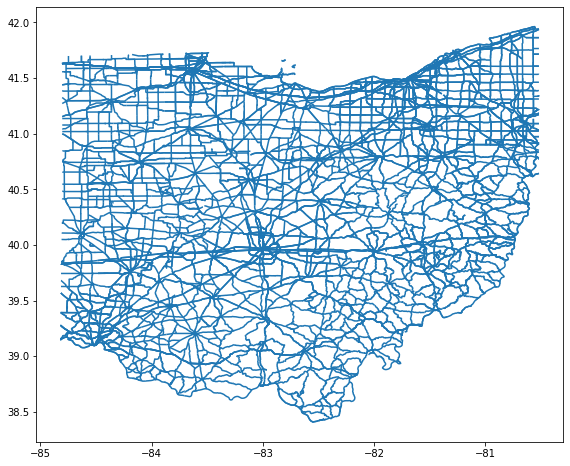

In [4]:
plt.figure(figsize=(16,8))
ax = plt.gca()
ohio_shp.plot(ax=ax)

## Segment Out Cases in Ohio

In [5]:
# fetch cases within Ohio
ohio_cases = df.loc[df['Province'] == 'Ohio'].copy(deep=False)
display(ohio_cases)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
805,United States of America,US,Ohio,Cuyahoga,39035.0,41.42,-81.66,3,confirmed,2020-03-10
973,United States of America,US,Ohio,Cuyahoga,39035.0,41.42,-81.66,3,confirmed,2020-03-11
1049,United States of America,US,Ohio,Stark,39151.0,40.81,-81.36,1,confirmed,2020-03-11
1120,United States of America,US,Ohio,Cuyahoga,39035.0,41.42,-81.66,3,confirmed,2020-03-12
1156,United States of America,US,Ohio,Stark,39151.0,40.81,-81.36,1,confirmed,2020-03-12
...,...,...,...,...,...,...,...,...,...,...
37206,United States of America,US,Ohio,Lorain,39093.0,41.30,-82.15,116,confirmed,2020-04-07
37207,United States of America,US,Ohio,Lucas,39095.0,41.62,-83.65,347,confirmed,2020-04-07
37208,United States of America,US,Ohio,Madison,39097.0,39.89,-83.40,18,confirmed,2020-04-07
37209,United States of America,US,Ohio,Mahoning,39099.0,41.02,-80.77,300,confirmed,2020-04-07


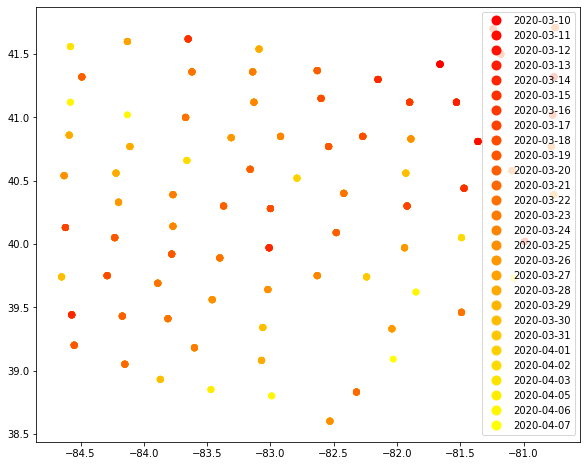

In [9]:
#ohio_points = [Point(xy) for xy in zip(ohio_cases['Lat'], ohio_cases['Lon'])]
ohio_gdf = gpd.GeoDataFrame(ohio_cases, geometry=gpd.points_from_xy(ohio_cases.Lon, ohio_cases.Lat))

# looks a bit like Ohio right?
plt.figure(figsize=(16,8))
ax = plt.gca()
ohio_gdf.plot(ax=ax, column='Date', cmap='autumn', legend=True)

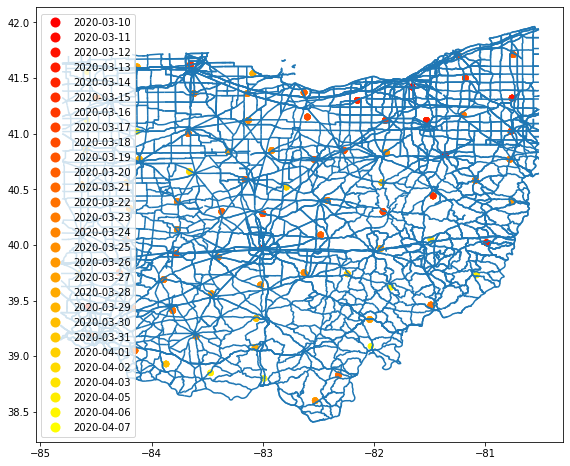

In [10]:
plt.figure(figsize=(16,8))
ax = plt.gca()
ohio_shp.plot(ax=ax)
ohio_gdf.plot(ax=ax, column='Date', cmap='autumn', legend=True, markersize=30, legend_kwds={'loc': 'lower left'})

In [8]:
# appears to be sorted already
ohio_cases.sort_values(by=['Date'], inplace=True, ascending=False)
display(ohio_cases)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date,geometry
37210,United States of America,US,Ohio,Marion,39101.0,40.59,-83.16,28,confirmed,2020-04-07,POINT (-83.16000 40.59000)
36879,United States of America,US,Ohio,Pickaway,39129.0,39.64,-83.02,31,confirmed,2020-04-07,POINT (-83.02000 39.64000)
36882,United States of America,US,Ohio,Preble,39135.0,39.74,-84.65,7,confirmed,2020-04-07,POINT (-84.65000 39.74000)
36883,United States of America,US,Ohio,Richland,39139.0,40.77,-82.54,20,confirmed,2020-04-07,POINT (-82.54000 40.77000)
36884,United States of America,US,Ohio,Ross,39141.0,39.34,-83.06,9,confirmed,2020-04-07,POINT (-83.06000 39.34000)
...,...,...,...,...,...,...,...,...,...,...,...
1156,United States of America,US,Ohio,Stark,39151.0,40.81,-81.36,1,confirmed,2020-03-12,POINT (-81.36000 40.81000)
1120,United States of America,US,Ohio,Cuyahoga,39035.0,41.42,-81.66,3,confirmed,2020-03-12,POINT (-81.66000 41.42000)
1049,United States of America,US,Ohio,Stark,39151.0,40.81,-81.36,1,confirmed,2020-03-11,POINT (-81.36000 40.81000)
973,United States of America,US,Ohio,Cuyahoga,39035.0,41.42,-81.66,3,confirmed,2020-03-11,POINT (-81.66000 41.42000)
